# Hackathon 1, statistics.

This project illustrates the course LEPL1109. You will study the emission of PM2.5 fine particles in Shanghai and Beijing, measured by US embassy/offices. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution. 


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

•	Do not comment your results directly into cells of code. Use instead a Markdown cell. 

•	"Dry" code or results not followed by a minimum of analysis / comments will be penalized.


## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “Hackathons” on Moodle and the subsection “Remise Hackathon 1”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Jonathan Bien 4374-22-00

Part. 2: Romain Bellens 3064-21-00

Part. 3: Ismaël Zaoudi 6055-22-00

Part. 4: Lionel Peduzzi 6969-22-00

Part. 5: Bence Bognar 3239-22-00

Part. 6: Louis Jacques 9080-22-00


# Air quality in China


PM2.5 consists of airborne particles with aerodynamic diameters less than 2.5 μm. They are known to adversely affect human
health. The U.S. Embassy in Beijing started releasing hourly PM2.5 readings in April 2008, followed by the consulates in Guangzhou, Shanghai, Chengdu, and Shenyang in November and December 2011, June 2012, and April 2013, respectively. China’s Ministry of Environmental Protection (MEP) began to report hourly PM2.5 data in 74 cities (which include the five cities with the U.S. diplomatic posts) from January 2013, which was extended to 338 cities in January 2015.

The time period for this data is between Jan 1st, 2010 to Dec 31st, 2015. Missing data are denoted as NA.

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* season: season of data in this row
* PM: PM2.5 concentration (µg/m^3)
* DEWP: Dew Point (Celsius Degree)
* TEMP: Temperature (Celsius Degree)
* HUMI: Humidity (%)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* precipitation: hourly precipitation (mm)
* Iprec: Cumulated precipitation (mm)

Reference: 

Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220-10236.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma as gamma
from scipy.stats import t as t
import csv
import pandas as pd
import seaborn as sns
import plotly.express as px

## 1. Basic statistics


------------------------------------------------------------------------------------------------------
1.1. We will focus on PM2.5 hourly measurements done by the US offices between the 1/1/2012 and 31/12/2015 in Beijing and Shanghai. 

a) Load datasets and merge them. Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Shanghai and Beijing (PM_US_Post). Notice that in a later question, you will also need PM2.5 emissions measured in Nongzhanguan.

Use the field 'season' to split the data of Shanghai and Bejing into:
* one sample for winter (season=4), 
* one sample for summer (season=2).
------------------------------------------------------------------------------------------------------

In [3]:
df1 = pd.read_csv('BeijingPM.csv')
df2 = pd.read_csv('ShanghaiPM.csv')

print("Columns in BeijingPM.csv:", df1.columns)
print("Columns in ShanghaiPM.csv:", df2.columns)

common_column = 'No','year', 'month', 'day', 'hour','season'

#Merge the DataFrames on the identified common column
merged_df = pd.merge(df1, df2, on=common_column)

#Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_file.csv', index=False, na_rep= 'Na')

print("Columns in merged_file.csv:", merged_df.columns)

Bejing_Winter = []
Bejing_Summer = []         # It's the 4 samples for the exercice 1
Shanghai_Winter = []
Shanghai_Summer = []

#Read the merged file and extract the PM_US Post values for the 4 samples from line 17522 to the end

with open('merged_file.csv') as f:
    reader = csv.DictReader(f)
    data = [row for row in reader]
    for row in data[17520:]:
        if row['season'] == '4' and row['PM_US Post_x'] != 'Na' and row['PM_US Post_y'] != 'Na':
            Bejing_Winter.append(row['PM_US Post_x'])
            Shanghai_Winter.append(row['PM_US Post_y'])
        elif row['season'] == '2'and row['PM_US Post_x'] != 'Na' and row['PM_US Post_y'] != 'Na':
            Bejing_Summer.append(row['PM_US Post_x'])
            Shanghai_Summer.append(row['PM_US Post_y'])

    
print("Bejing first winter", Bejing_Winter[0])
print("Shagain first winter" ,Shanghai_Winter[0] )
print("Bejing last winter", Bejing_Winter[-1])
print("shagai last winter", Shanghai_Winter[-1])


Columns in BeijingPM.csv: Index(['No', 'year', 'month', 'day', 'hour', 'season', 'PM_Dongsi',
       'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post', 'DEWP', 'HUMI',
       'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'],
      dtype='object')
Columns in ShanghaiPM.csv: Index(['No', 'year', 'month', 'day', 'hour', 'season', 'PM_Jingan',
       'PM_US Post', 'PM_Xuhui', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd', 'Iws',
       'precipitation', 'Iprec'],
      dtype='object')
Columns in merged_file.csv: Index(['No', 'year', 'month', 'day', 'hour', 'season', 'PM_Dongsi',
       'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post_x', 'DEWP_x', 'HUMI_x',
       'PRES_x', 'TEMP_x', 'cbwd_x', 'Iws_x', 'precipitation_x', 'Iprec_x',
       'PM_Jingan', 'PM_US Post_y', 'PM_Xuhui', 'DEWP_y', 'HUMI_y', 'PRES_y',
       'TEMP_y', 'cbwd_y', 'Iws_y', 'precipitation_y', 'Iprec_y'],
      dtype='object')
Bejing first winter 303.0
Shagain first winter 112.0
Bejing last winter 235.0
shagai last winter 

b) Calculate the mean, variance, median, 25% and 75% quantiles of emissions during winter and summer in Shanghai and Beijing. Present them in clean table. Comment your results.

In [17]:
#print(Bejing_Summer)
#print(Bejing_Winter)
#print(Shanghai_Summer)
#print(Shanghai_Winter)

#print(type(Bejing_Summer[0])) #test format: Ce sont des strings!

#Conversion des valeurs string des lists en des floats

WINTER_MATRIX_BEIJING = [float(i) for i in Bejing_Winter]
SUMMER_MATRIX_BEIJING = [float(i) for i in Bejing_Summer]

WINTER_MATRIX_SHANGHAI = [float(i) for i in Shanghai_Winter]
SUMMER_MATRIX_SHANGHAI = [float(i) for i in Shanghai_Summer]

#print(type(SUMMER_MATRIX_BEIJING[0])) #test format: Ce sont des floats!

###BEIJING
# Winter

wlengthb = len(WINTER_MATRIX_BEIJING)
wmeanb = np.mean(WINTER_MATRIX_BEIJING)
wvarianceb = np.var(WINTER_MATRIX_BEIJING, ddof=1)
wdevstdb = np.sqrt(wvarianceb)
wmedianb = np.median(WINTER_MATRIX_BEIJING)
#wq25b = np.percentile(WINTER_MATRIX_BEIJING, 25) #quantile, percentile commandes sont equivalentes
#wq75b = np.percentile(WINTER_MATRIX_BEIJING, 75)
wq25b = np.quantile(WINTER_MATRIX_BEIJING, 0.25)
wq75b = np.quantile(WINTER_MATRIX_BEIJING, 0.75)

#print(Bejing_Summer)
#print(wmeanb) #MARCHE
#print(wvarianceb)  #MARCHE
#print(wmedianb) #MARHCE

# Summer

slengthb = len(SUMMER_MATRIX_BEIJING)
smeanb = np.mean(SUMMER_MATRIX_BEIJING)
svarianceb = np.var(SUMMER_MATRIX_BEIJING, ddof=1)
sdevstdb = np.sqrt(svarianceb)
smedianb = np.median(SUMMER_MATRIX_BEIJING)
#sq25b = np.percentile(SUMMER_MATRIX_BEIJING, 25)
#sq75b = np.percentile(SUMMER_MATRIX_BEIJING, 75)
sq25b = np.quantile(SUMMER_MATRIX_BEIJING, 0.25)
sq75b = np.quantile(SUMMER_MATRIX_BEIJING, 0.75)


###SHANGHAI
# Winter

wlengths = len(WINTER_MATRIX_SHANGHAI)
wmeans = np.mean(WINTER_MATRIX_SHANGHAI)
wvariances = np.var(WINTER_MATRIX_SHANGHAI, ddof=1)
wdevstds = np.sqrt(wvariances)
wmedians = np.median(WINTER_MATRIX_SHANGHAI)
#wq25s = np.percentile(WINTER_MATRIX_SHANGHAI, 25)
#wq75s = np.percentile(WINTER_MATRIX_SHANGHAI, 75)
wq25s = np.quantile(WINTER_MATRIX_SHANGHAI, 0.25)
wq75s = np.quantile(WINTER_MATRIX_SHANGHAI, 0.75)

# Summer

slengths = len(SUMMER_MATRIX_SHANGHAI)
smeans = np.mean(SUMMER_MATRIX_SHANGHAI)
svariances = np.var(SUMMER_MATRIX_SHANGHAI, ddof=1)
sdevstds = np.sqrt(svariances)
smedians = np.median(SUMMER_MATRIX_SHANGHAI)
#sq25s = np.percentile(SUMMER_MATRIX_SHANGHAI, 25)
#sq75s = np.percentile(SUMMER_MATRIX_SHANGHAI, 75)
sq25s = np.quantile(SUMMER_MATRIX_SHANGHAI, 0.25)
sq75s = np.quantile(SUMMER_MATRIX_SHANGHAI, 0.75)

#TODO: cleanup code

2978.2273471618737
15602.260067499317
611.4814848646303
3310.0056569256185


## Tables                    

Our results rounded to the 4th digit:

| City, Season    | PM mean  | variance   | quantile 25 | median | quantile 75 |
| --------------- | -------- | ---------- | ----------- | ------ | ----------- |
| Beijing  Summer | 71.8408  | 2978.2273  | 30.0        | 59.0   | 100.0       |
| Beijing  Winter | 122.4049 | 15602.2601 | 21.0        | 82.0   | 180.0       |
| Shanghai Summer | 33.8918  | 611.4815   | 16.0        | 29.0   | 46.0        |
| Shanghai Winter | 76.2701  | 3310.0057  | 36.0        | 60.0   | 99.0        |

Comments here:

Differences, similarites, outliers, etc...

Donnees avec moyen bcp plus bas que median, donnees tres extremement distribues: majorite en bas avec beaucoup d'extremes, myen inter-quantile haut - difference moyen median avec beaucoup de autliers, haut variance, si median ou moyen proche des quantiles
25% des donnes en dessous de 20, etc...


-----------------------------------------------------------------------------------------------------------------------

1.2. Draw box plots of PM2.5 emissions in Beijing and Shanghai / summer & winter (in total 4 box plots).

Search on internet, what are the recommended maximum level of PM2.5 and comment your results.

------------------------------------------------------------------------------------------------------------------------



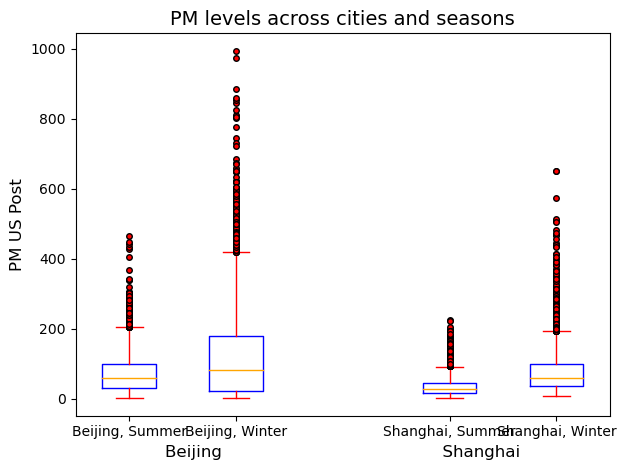

In [25]:
np.random.seed(10)

#Création de data pour les boxlplots
#data_beijing_summer = np.concatenate(SUMMER_MATRIX_BEIJING,,,)
#data_beijing_winter = np.concatenate(WINTER_MATRIX_BEIJING,,,)
#data_shanghai_summer = np.concatenate(SUMMER_MATRIX_SHANGHAI,,,)
#data_shanghai_winter = np.concatenate(WINTER_MATRIX_SHANGHAI,,,)

'''
# 4 separate boxplots w/ different scales => not good for comparing

#Create subplots
fig, axs = plt.subplots(2,2, figsize = (10,10))

#Beijing Summer
axs[0][0].boxplot(SUMMER_MATRIX_BEIJING)
axs[0][0].set_title("Beijing, Summer")
axs[0][0].set_xlabel("Data")
axs[0][0].set_ylabel("PM US Post")

#Beijing Winter
axs[0][1].boxplot(WINTER_MATRIX_BEIJING)
axs[0][1].set_title("Beijing, Winter")
axs[0][1].set_xlabel("Data")
axs[0][1].set_ylabel("PM US Post")

#Shanghai Summer
axs[1][0].boxplot(SUMMER_MATRIX_SHANGHAI)
axs[1][0].set_title("Shanghai, Summer")
axs[1][0].set_xlabel("Data")
axs[1][0].set_ylabel("PM US Post")

#Shanghai Winter
axs[1][1].boxplot(WINTER_MATRIX_SHANGHAI)
axs[1][1].set_title("Shanghai, Winter")
axs[1][1].set_xlabel("Data")
axs[1][1].set_ylabel("PM US Post")

plt.tight_layout()
plt.show()
'''



# 4 datasets on the same scale, easier to compare :)

#Create dataset
Dataset = [SUMMER_MATRIX_BEIJING, WINTER_MATRIX_BEIJING, SUMMER_MATRIX_SHANGHAI, WINTER_MATRIX_SHANGHAI]
#Hypothetical dataset if distribution was normal distribution!
Distributions = [np.random.normal(smeanb, svarianceb, slengthb), np.random.normal(wmeanb, wvarianceb, wlengthb), np.random.normal(smeans, svariances, slengths), np.random.normal(wmeans, wvariances, wlengths)]

#Plot boxplot
#plt.boxplot(Dataset, positions=[1,2,4,5], labels=["Beijing, Summer", "Beijing, Winter", "Shanghai, Summer", "Shanghai, Winter"], boxprops=dict(color="blue"), whiskerprops=dict(color="red"), capprops=dict(color="red"), medianprops=dict(color="orange"), flierprops=dict(markerfacecolor="red",marker="o", markersize=4))
plt.boxplot(Dataset, positions=[1,2,4,5], labels=["Summer", "Winter", "Summer", "Winter"], boxprops=dict(color="blue"), whiskerprops=dict(color="red"), capprops=dict(color="red"), medianprops=dict(color="orange"), flierprops=dict(markerfacecolor="red",marker="o", markersize=4))
#plt.boxplot(Distributions, positions=[1,2,4,5], labels=["Beijing, Summer", "Beijing, Winter", "Shanghai, Summer", "Shanghai, Winter"],boxprops=dict(color="blue"), whiskerprops=dict(color="red"), capprops=dict(color="red"), medianprops=dict(color="orange"), flierprops=dict(markerfacecolor="red",marker="o", markersize=4))

plt.title("PM levels across cities and seasons", fontsize = 14)
#plt.xlabel("Datasets", fontsize = 12)
plt.xlabel("Beijing                                          Shanghai", fontsize = 12)
plt.ylabel("PM US Post", fontsize = 12)
plt.tight_layout()
plt.show()
#TODO: resize text so doesn't collide with other labels text

#Comment: red dots w/ black highlights are only the outliers! (this is NOT a swarmplot!)

#tutoriel utilisation boxplot: datacamp.com/tutorial/python-boxplots

#TODO: cleanup code

#TODO: NE pas oubleir de faire le commentaire des reultats, citer un source for max recommended PM levels!!!

Comments here:


## 2. Fit of distributions 


------------------------------------------------------------------------------------------------------

2.1. Fit a Gamma distribution to PM2.5 emissions in Beijing and Shanghai (winter & summer). Warning, in python, the Gamma distribution has a parameter of location which translate the distribution from $[0,+\infty)$ to $[loc,+\infty)$. Force its value to zero during the calibration (option floc=0) to consider only positive values.

a) Estimate Gamma parameters by log-likelihood maximization (MLE). Present them in a clean table **AND** calculate the log-likelihood.  

------------------------------------------------------------------------------------------------------

In [6]:
# Code here 
a_wmb,z, b_wmb = gamma.fit(WINTER_MATRIX_BEIJING, floc = 0)
a_smb,z, b_smb = gamma.fit(SUMMER_MATRIX_BEIJING, floc = 0)
a_wms,z, b_wms = gamma.fit(WINTER_MATRIX_SHANGHAI, floc = 0)
a_sms,z, b_sms = gamma.fit(SUMMER_MATRIX_SHANGHAI, floc = 0)

list_parameters = [[a_wmb, b_wmb], [a_smb, b_smb], [a_wms, b_wms], [a_sms, b_sms]]

pdf_wmb = gamma.pdf(WINTER_MATRIX_BEIJING, a_wmb, loc = 0, scale = b_wmb)
pdf_smb = gamma.pdf(SUMMER_MATRIX_BEIJING, a_smb, loc = 0, scale = b_smb)
pdf_wms = gamma.pdf(WINTER_MATRIX_SHANGHAI, a_wms, loc = 0, scale = b_wms)
pdf_sms = gamma.pdf(SUMMER_MATRIX_BEIJING, a_sms, loc = 0, scale = b_sms)

MLE_wmb = np.sum(gamma.logpdf(WINTER_MATRIX_BEIJING, a_wmb, loc = 0, scale = b_wmb))
MLE_smb = np.sum(gamma.logpdf(SUMMER_MATRIX_BEIJING, a_smb, loc = 0, scale = b_smb))
MLE_wms = np.sum(gamma.logpdf(WINTER_MATRIX_SHANGHAI, a_wms, loc = 0, scale = b_wms))
MLE_sms = np.sum(gamma.logpdf(SUMMER_MATRIX_BEIJING, a_sms, loc = 0, scale = b_sms))







b) Plot the 4 histograms of PM2.5 and add the fitted gamma pdf’s on the same plot. What is your overall feeling about the quality of estimation?

Gamma PDF Pékin Hiver: min=1.4627244577175433e-06, max=inf


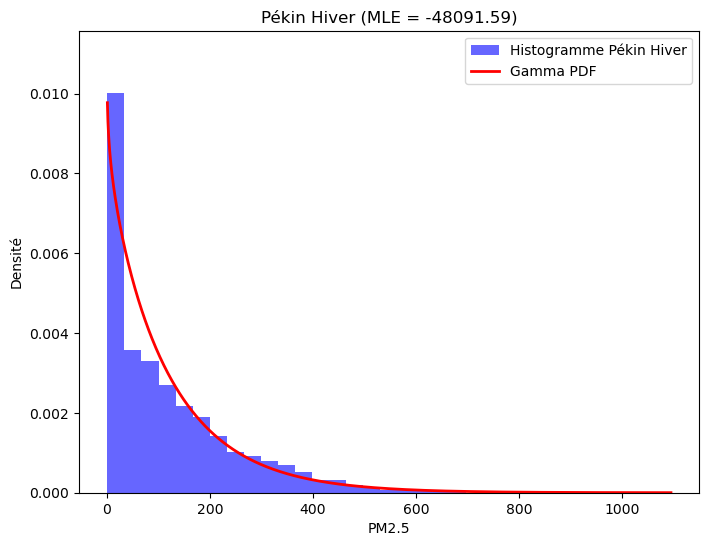

Gamma PDF Pékin Été: min=0.0, max=0.010075192488283414


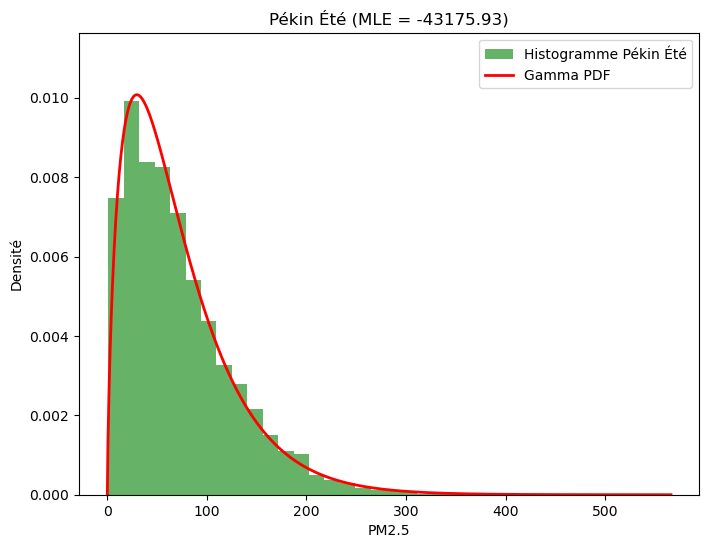

Gamma PDF Shanghai Hiver: min=0.0, max=0.009859648172837908


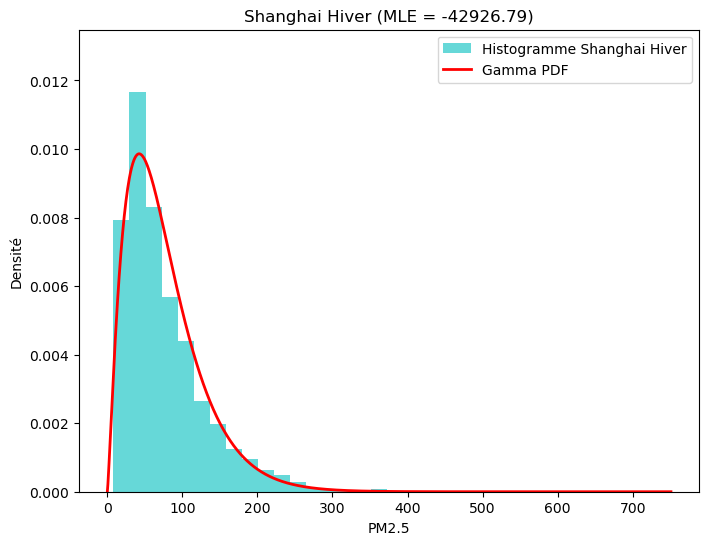

Gamma PDF Shanghai Été: min=0.0, max=0.021395110752073607


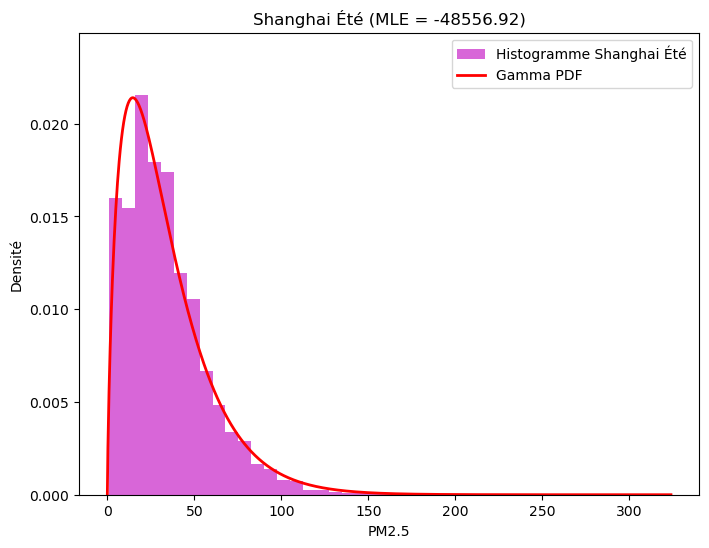

In [7]:
def plot_histogram_and_pdf(data, a, b, title, color, mle):
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=30, density=True, alpha=0.6, color=color, label=f'Histogramme {title}')

    x = np.linspace(0, np.max(data) + 100, 1000)
    gamma_pdf = gamma.pdf(x, a, loc=0, scale=b)

    print(f"Gamma PDF {title}: min={np.min(gamma_pdf)}, max={np.max(gamma_pdf)}")

    plt.plot(x, gamma_pdf, 'r-', lw=2, label='Gamma PDF')
    plt.title(f'{title} (MLE = {mle:.2f})')
    plt.legend()
    plt.xlabel('PM2.5')
    plt.ylabel('Densité')
    plt.ylim(0, plt.ylim()[1] * 1.1) 
    plt.show()

plot_histogram_and_pdf(WINTER_MATRIX_BEIJING, a_wmb, b_wmb, 'Pékin Hiver', 'b', MLE_wmb)
plot_histogram_and_pdf(SUMMER_MATRIX_BEIJING, a_smb, b_smb, 'Pékin Été', 'g', MLE_smb)
plot_histogram_and_pdf(WINTER_MATRIX_SHANGHAI, a_wms, b_wms, 'Shanghai Hiver', 'c', MLE_wms)
plot_histogram_and_pdf(SUMMER_MATRIX_SHANGHAI, a_sms, b_sms, 'Shanghai Été', 'm', MLE_sms)

Comments here:


------------------------------------------------------------------------------------------------------

2.2. You have fitted 4 gamma random variables to PM2.5 emissions in Shanghai, Beijing during summer and winter.

* Present the anatytical formulas of the mean and standard deviation of a gamma distribution. Calculate the expected levels and the standard devations of the PM2.5 emissions (in Shanghai, Beijing during summer and winter) relying on the fitted gamma random variables. 
* Calculate the 25%, 50% and 75% percentiles of these gamma distributions.
* Compare your results with the empirical statistics previously computed. Please comment your results.

------------------------------------------------------------------------------------------------------

In [8]:
# Code here


Comments here:



------------------------------------------------------------------------------------------------------

2.3. The quality of the MLE estimators depends upon many factors. One way to estimate it is to bootstrap the dataset. We will focus here exclusively on PM2.5 emissions in Beijing, during the winter time.

* Bootstrap 1000 times a sample of 6000 daily emissions for Beijing (winter) and plot an histogram of estimated alpha and scale parameters.

* Compute a 5% confidence interval for parameter(s) estimates for the best distribution obtained by MLE. 

* How do you interpret the results? Is the accuracy good?

------------------------------------------------------------------------------------------------------

In [9]:
#Code here


Comments here:


## 3. Regression and forecasting 

------------------------------------------------------------------------------------------------------

3.1. In this question, you will determine if PM2.5 emissions levels depends upon weather conditions. We focus
on emissions measured by the US embassy in Beijing, during winter.

Regress PM2.5 emissions in Beijing (season 4) with respect to:
 * DEWP: Dew Point (Celsius Degree)
 * TEMP: Temperature (Celsius Degree)
 * HUMI: Humidity (%)
 * PRES: Pressure (hPa)
 * cbwd: Combined wind direction
 * Iws: Cumulated wind speed (m/s)
 * precipitation: hourly precipitation (mm)

The variable 'cbwd' is categorical. Convert it into dummy variables (0 or 1) with panda.get_dummies. Do not forget to drop one modality of this variable. Remove lines from the dataset with NaN entries.

* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* Comment your results (goodness of fit, R2, F-stat and T-stats of coefficients)
* Answer this : Does high hourly precipitation (mm) mitigate PM2.5 emissions?

------------------------------------------------------------------------------------------------------

In [10]:
def Regression(data, Y, n):
    """
    inputs:
    data: numpy array de longueur 7*n contenat les données
    Y: numpy array de longueur 7*1 contenant les valeurs de PM2.5
    n : nombre de données pour chaque variable
    
    return:
    Y numpy array contenant la meilleure aproximation de y en régression linéaire
    data_cst : tableau numpy étant la matrice data + la constante
    Results.summary() : résultats de la régression
    beta_array : array numpy contenant les valeurs des betas
    
    """
    data = sm.add_constant(data)
    Results = sm.OLS(Y, data).fit()
    beta_array = Results.params
    Y_estimator = Results.predict(data)
    return (Results.summary(), Y_estimator, data, beta_array)

summary, Y_estimator, data_cst, Beta = Regression(data, Y, n)


def Goodness_of_fit(Y, Y_estimator, Y_mean):
    
    SSE = np.dot(Y-Y_estimator,Y-Y_estimator)
    SSR = np.dot(Y_estimator-Y_mean, Y_estimator-Y_mean)
    R2 = SSE/SSR
    return R2

print(Goodness_of_fit(Y, Y_estimator, Y_mean))

NameError: name 'Y' is not defined

Comments here:


------------------------------------------------------------------------------------------------------

3.2. We design a simple auto-regressive model for predicting the PM 2.5 emissions over the next hour, in Beijing, measured at the US embassy (warning, we consider emissions between the 1/1/2012 and 31/12/2015 and during all seasons).

Let us denote by E(t) the emission at time 't'. We an autoregressive model defined as follows:

$$E(t) = \sum_{k=1}^{3} a_k E(t-k) $$

a. We split the dataset into a training set (the first 75% of data included) and a validation set (the remaining 25%).

b.	Estimate this model with statsmodels on the training set. 

c.	Analyze statistics reported by statsmodel.

------------------------------------------------------------------------------------------------------

In [10]:
# Code here


Comments here:

------------------------------------------------------------------------------------------------------

3.3. Use this model on the test set to forecast the PM2.5 hourly emissions on the test set.

a. Compare on a graph, the forecast to real emissions.

b. Plot the errors of prediction. Are they acceptable? Compute the mean absolute error (MAE) of prediction on the training and test sets.
 
------------------------------------------------------------------------------------------------------

In [11]:
# Code here


Comments here:


## 4. Hypothesis tests

------------------------------------------------------------------------------------------------------
4.1. You will compare the average PM2.5 emissions measured at the US embassy in Beijing (PM_US Post_y), during winter with emissions reported by Chinese authorities in Nongzhanguan (PM_Nongzhanguan), a district of Beijing close to the US embassy.

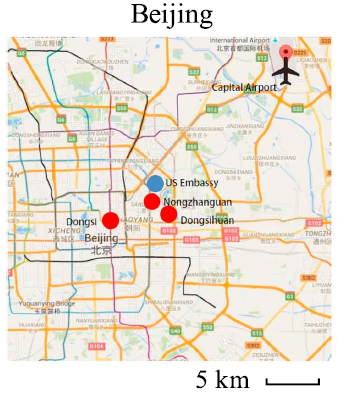


a) Reload the data from 'BeijingPM.csv' file. Keep data from the 1/1/2012 and 31/12/2015 in winter time(season 4). Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Nongzhanguan (PM_Nongzhanguan) and Beijing (PM_US Post), to keep the same number of observations.

------------------------------------------------------------------------------------------------------

In [23]:
Bejing_Winter_question4 = []
Nongzhanguan_Winter_question4 = []

with open('BeijingPM.csv') as f:
    reader = csv.DictReader(f)
    data = [row for row in reader]
    for row in data[17520:]:
        if row['season'] == '4' and row['PM_US Post'] != 'NA' and row['PM_Nongzhanguan'] != 'NA':
            Bejing_Winter_question4.append(row['PM_US Post'])
            Nongzhanguan_Winter_question4.append(row['PM_Nongzhanguan'])

Bejing_Winter_question4 = [float(i) for i in Bejing_Winter_question4]
Nongzhanguan_Winter_question4 = [float(i) for i in Nongzhanguan_Winter_question4]


print(Bejing_Winter_question4[0])
print(Bejing_Winter_question4[-1])
print(Nongzhanguan_Winter_question4[0])
print(Nongzhanguan_Winter_question4[-1])
            


34.0
212.0
20.0
221.0


b) Perfom a  the Stutent's T test to check if the average hourly PM2.5 emissions are the same in Nongzhanguan and at the US embassy. The null hypothesis is

$H_0$: $\mu_{US} = \mu_{Nongzhanguan}$.

Use a confidence level of 5%. Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?


In [36]:
test_statistic = (np.mean(Bejing_Winter_question4) - np.mean(Nongzhanguan_Winter_question4))/(np.sqrt(np.var(Bejing_Winter_question4)/len(Bejing_Winter_question4)))
print(test_statistic)

student_t = t.ppf(1-0.05, len(Bejing_Winter_question4)-1)
print(student_t)

if test_statistic > student_t:
    print("H0 is rejected")

p_value = 1 - t.cdf(test_statistic, len(Bejing_Winter_question4)-1)
print(p_value)

if p_value < 0.05:
    print("H0 is rejected")

5.049824024584713
1.645115574920127
H0 is rejected
2.2784595254954354e-07
H0 is rejected


Comment here: Les émissions de PM2.5 sont distribuées par une normale de variance inconnue.


c) Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

Comment here:

d) Apply the Wilcoxon's test to distributions of the hourly PM2.5 emissions in Nongzhanguan and at the US embassy. What can you conclude ?

In [14]:
# Code here


Comment here:

